In [1]:
! pip install -Uqq fastai fastbook duckduckgo_search

In [2]:
#hide
# ! [ -e /content ] && pip install -Uqq fastbook duckduckgo_search
import fastbook
fastbook.setup_book()

In [3]:
# from duckduckgo_search import ddg_images
from fastbook import *
from fastai.vision.widgets import *
# from fastcore.all import *

In [4]:
# Search DuckDuckGo
#
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [5]:
# Search for a grizzly with ddg
#
ims = search_images_ddg('floor photos')
len(ims)

200

In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [7]:
urls = search_images('wood floor photos', max_images=1)
urls[0]

Searching for 'wood floor photos'


'https://www.uniquewoodfloor.com/media/catalog/product/h/e/herringbone_bronze1_1.jpg'

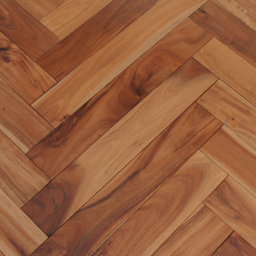

In [8]:
# Look at one image
#
from fastdownload import download_url
dest = 'wood.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'ceramic floor photos'


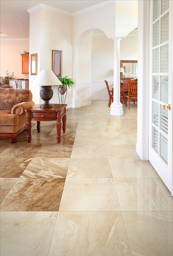

In [9]:
download_url(search_images('ceramic floor photos', max_images=1)[0], 'ceramic.jpg', show_progress=False)
Image.open('ceramic.jpg').to_thumb(256,256)

Searching for 'stone floor photos'


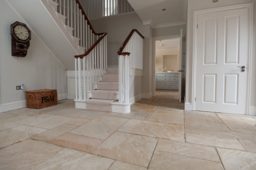

In [10]:
download_url(search_images('stone floor photos', max_images=1)[0], 'stone.jpg', show_progress=False)
Image.open('stone.jpg').to_thumb(256,256)

In [11]:
floor_types = 'wood','ceramic','stone'
path = Path('floor')

In [12]:
if not path.exists():
    path.mkdir()
    for o in floor_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} floor')
        download_images(dest, urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#555) [Path('floor/ceramic/022cc125-a44a-46dd-bfe2-918c48d7b79b.jpg'),Path('floor/ceramic/02a552fd-fdb1-45a3-8c3c-32994aeceff9.jpg'),Path('floor/ceramic/03dab7fe-9993-4d06-9dee-b24e2ee2dcfb.jpg'),Path('floor/ceramic/03fa9c98-40e2-4be2-ab19-d44c4c6d2d1b.jpg'),Path('floor/ceramic/0470ae0c-1c89-42af-8663-47c7d6236f50.jpg'),Path('floor/ceramic/0561442f-1916-4848-9258-e8fbc3409e3f.jpg'),Path('floor/ceramic/06fc9ee3-e185-4152-a08e-15c66af10a55.jpg'),Path('floor/ceramic/07c9e149-78ba-439e-9871-863dee81436c.jpeg'),Path('floor/ceramic/08501e40-e997-4f89-beda-4ffaac39aafc.jpg'),Path('floor/ceramic/09c46202-8b40-490d-bac3-18457a547fdf.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#4) [Path('floor/ceramic/67ef4a98-b9d1-4666-be9f-c4e5910f9f16.jpg'),Path('floor/ceramic/acba957a-23c2-4619-b8b7-6c186b44af50.jpg'),Path('floor/stone/caa239ff-f5c0-4297-81ed-5835b28092ed.jpg'),Path('floor/stone/ecfd943d-703f-4f96-acb5-c7697fd43415.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
floor = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # 1
    get_items=get_image_files, # 2
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 3
    get_y=parent_label, # 4
    item_tfms=Resize(128)) # 

In [ ]:
dls = floor.dataloaders(path)

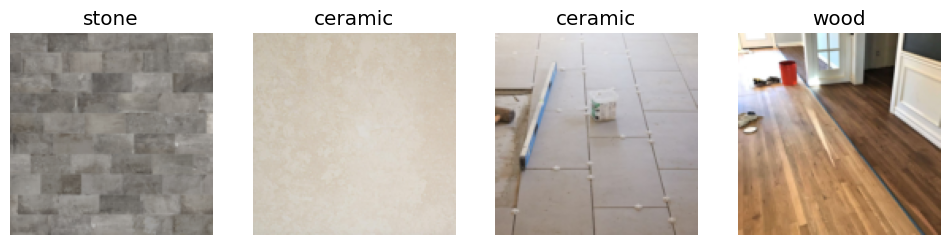

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

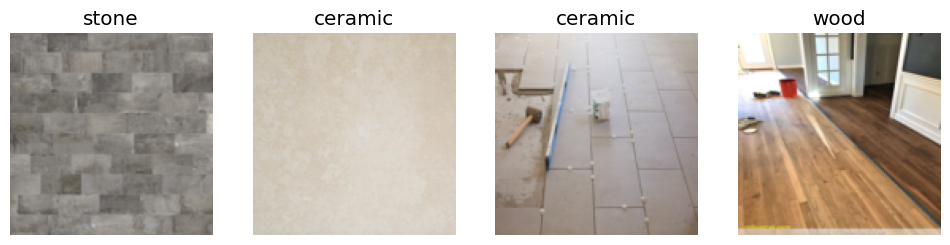

In [ ]:
floor = floor.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = floor.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

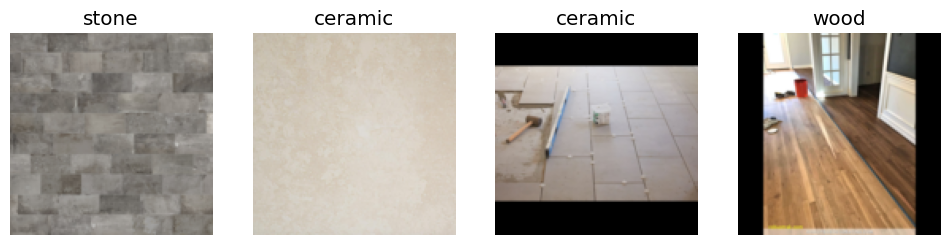

In [ ]:
floor = floor.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = floor.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

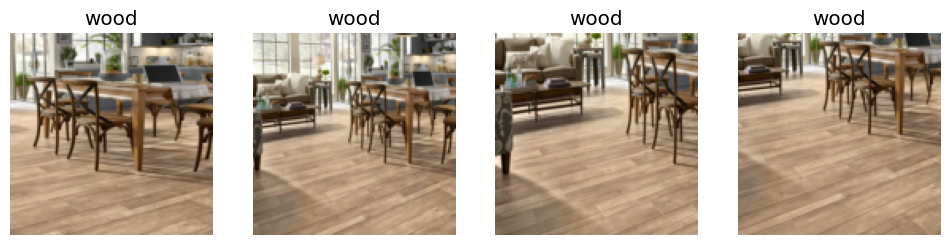

In [ ]:
floor = floor.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = floor.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

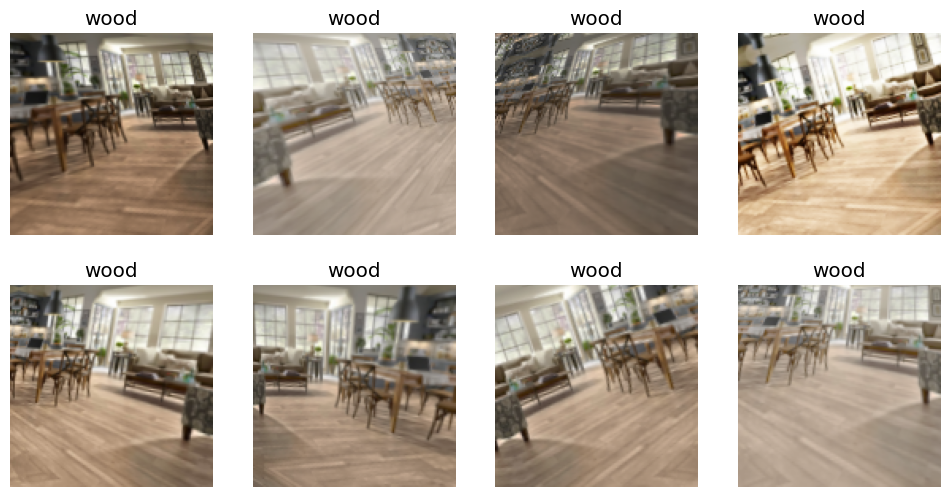

In [ ]:
floor = floor.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = floor.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
floor = floor.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = floor.dataloaders(path)

In [ ]:
# Create the Learner and fine-tune it
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

C:\Users\muril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\muril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.590121,1.223095,0.381818,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.306739,0.621068,0.218182,00:53
1,1.084483,0.520496,0.209091,00:53
2,0.913850,0.537666,0.200000,00:53
3,0.826178,0.543368,0.200000,00:56


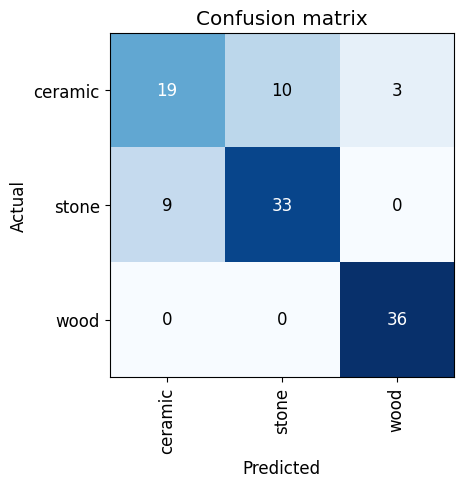

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

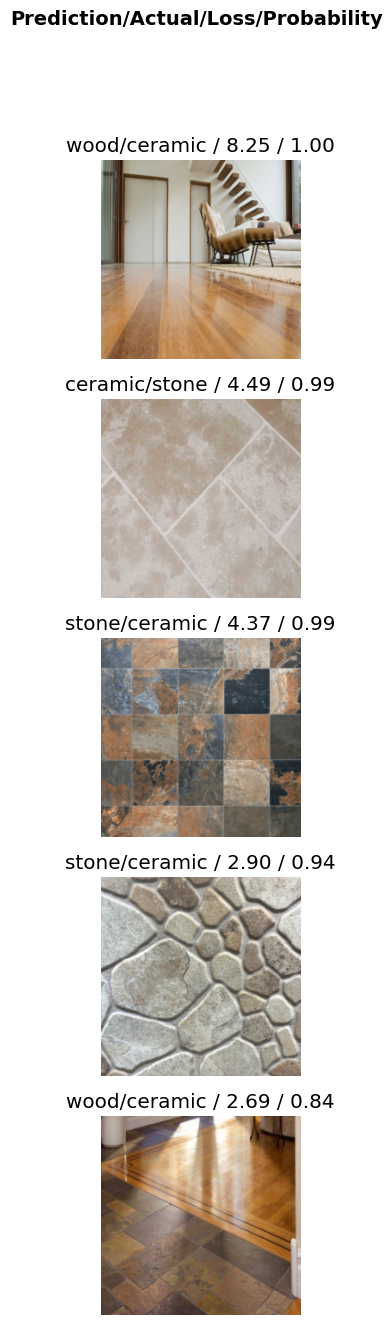

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['ceramic', 'stone', 'wood']

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

!pip install voila

!jupyter serverextension enable --sys-prefix voila 